<a href="https://colab.research.google.com/github/Sivabalajich/Balaji/blob/Balaji/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

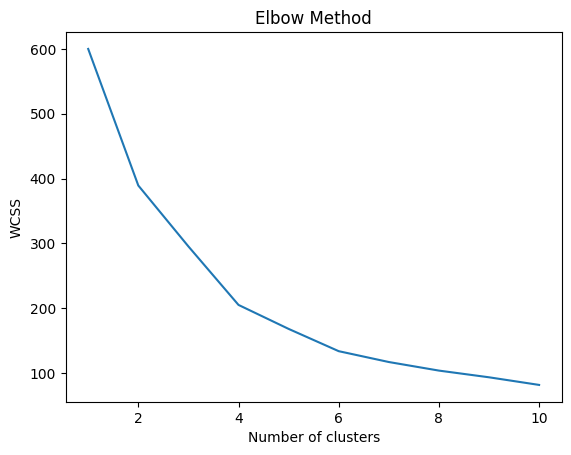

         Age  Annual Income (k$)  Spending Score (1-100)
0  32.853659           87.341463               79.975610
1  50.406250           60.468750               33.343750
2  25.142857           43.269841               56.507937


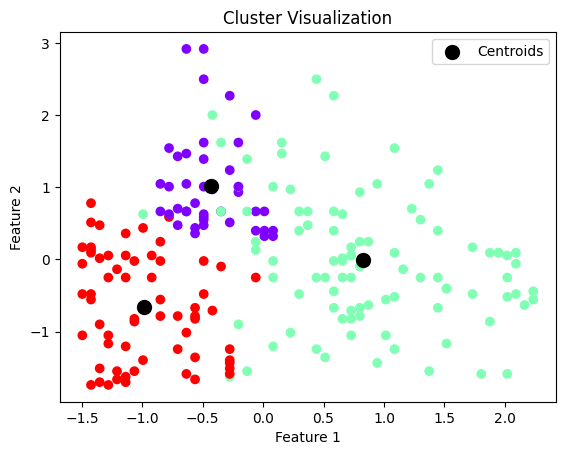

In [8]:
#Mall Customer Segmentation Customer Analysis with Customer Segmentation  Analysis with python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your customer data
customer_data = pd.read_csv('Mall_Customers.csv')  # Replace with your data file

# Data Preprocessing
# Remove any unnecessary columns
customer_data = customer_data.drop(['CustomerID'], axis=1)
customer_data = customer_data.drop(['Gender'], axis=1)

# Handle missing data (if any)
customer_data = customer_data.dropna()

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Determine the number of clusters (K) using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

# Based on the elbow method, choose an appropriate number of clusters (K)
# Let's say K=3 for this example
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to your original data
customer_data['Cluster'] = clusters

# Explore and interpret the clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=customer_data.columns[:-1])
print(cluster_centers)

# Visualize the clusters (for 2D data)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()